In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("movie.csv")
sd = pd.read_csv("rating.csv")
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [4]:
df.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df.shape

(27278, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [7]:
df.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [8]:
df.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [9]:
sd.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [10]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [11]:
sd.shape

(20000263, 4)

In [12]:
sd.dtypes

userId         int64
movieId        int64
rating       float64
timestamp     object
dtype: object

In [13]:
sd.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

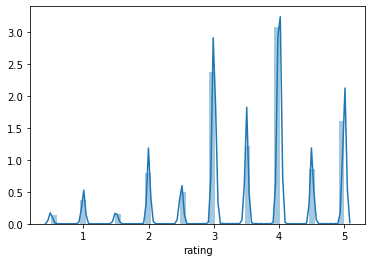

In [14]:
sns.distplot(sd["rating"])

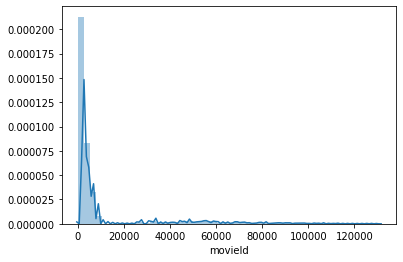

In [15]:
sns.distplot(sd["movieId"])

In [16]:
df = df.loc[:,["movieId", "title"]]
df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [17]:
sd = sd.loc[:, ["userId","movieId","rating"]]
sd.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [18]:
dados = pd.merge(df, sd)
dados

,movieId,title,userId,rating
0,1,Toy Story (1995),3,4.0
1,1,Toy Story (1995),6,5.0
2,1,Toy Story (1995),8,4.0
3,1,Toy Story (1995),10,4.0
4,1,Toy Story (1995),11,4.5
...,...,...,...,...
20000258,131254,Kein Bund für's Leben (2007),79570,4.0
20000259,131256,"Feuer, Eis & Dosenbier (2002)",79570,4.0
20000260,131258,The Pirates (2014),28906,2.5
20000261,131260,Rentun Ruusu (2001),65409,3.0


In [19]:
dados.shape

(20000263, 4)

In [20]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   movieId  int64  
 1   title    object 
 2   userId   int64  
 3   rating   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 762.9+ MB


## Sistema de recomendação de filmes - Movie-Lens

In [21]:
dados = dados.iloc[:9000000, :]
dados

,movieId,title,userId,rating
0,1,Toy Story (1995),3,4.0
1,1,Toy Story (1995),6,5.0
2,1,Toy Story (1995),8,4.0
3,1,Toy Story (1995),10,4.0
4,1,Toy Story (1995),11,4.5
...,...,...,...,...
8999995,1909,"X-Files: Fight the Future, The (1998)",119181,4.0
8999996,1909,"X-Files: Fight the Future, The (1998)",119187,4.0
8999997,1909,"X-Files: Fight the Future, The (1998)",119194,4.0
8999998,1909,"X-Files: Fight the Future, The (1998)",119220,4.5


In [58]:
def recomendacao_filmes(filmes):
    filmes = dados.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
    return filmes
    
def filmes_recomendacao(filmes2):
    filmes_recomendacao = pivot_table["Bad Boys (1995)"]
    filmes_recomendacao_simil = pivot_table.corrwith(filmes_recomendacao)
    filmes_recomendacao_simil = filmes_recomendacao_simil.sort_values(ascending = False)
    filmes_recomendacao_simil
    return

recomendacao_filmes = filmes_recomendacao_simil.head(10)
recomendacao_filmes

title
Bad Boys (1995)                        1.000000
Tar (1996)                             1.000000
Ride (1998)                            0.942075
Jar, The (Khomreh) (1992)              0.934199
Regular Guys (Echte Kerle) (1996)      0.872402
Tickle in the Heart, A (1996)          0.816497
Beans of Egypt, Maine, The (1994)      0.759257
Here Comes Cookie (1935)               0.758560
Headless Body in Topless Bar (1995)    0.723747
Kids of Survival (1996)                0.718421
dtype: float64

In [62]:
filmes_recomendacao = pivot_table["Ace Ventura: When Nature Calls (1995)"]
filmes_recomendacao_simil = pivot_table.corrwith(filmes_recomendacao)
filmes_recomendacao_simil = filmes_recomendacao_simil.sort_values(ascending = False)

In [61]:
recomendacao_filmes = filmes_recomendacao_simil.head(10)
recomendacao_filmes

title
Leather Jacket Love Story (1997)                            1.000000
Ace Ventura: When Nature Calls (1995)                       1.000000
Tar (1996)                                                  1.000000
Moonlight Murder (1936)                                     1.000000
Paralyzing Fear: The Story of Polio in America, A (1998)    0.933257
I Shot a Man in Vegas (1995)                                0.916303
Headless Body in Topless Bar (1995)                         0.861254
Squeeze (1997)                                              0.843937
Illtown (1996)                                              0.840168
Boy Called Hate, A (1995)                                   0.791224
dtype: float64